# 神奈川県のコロナデータ分析

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import japanize_matplotlib

In [2]:
import sys
sys.path.append('../')
%cd '../'

import src.tool as tool

%reload_ext autoreload
%autoreload 2

/home/tsu-nera/repo/hack-for-corona


In [3]:
patients = tool.read_patients()

In [4]:
patients.tail(5)

,情報公開日,発病確認日,年代,性別,職業,居住地,備考,情報元
68,2020-03-20,2020-03-20,90代,女性,無職,神奈川県横須賀市,NaN,https://www.pref.kanagawa.jp/documents/58277/2...
69,2020-03-20,2020-03-20,30代,男性,会社員,神奈川県横浜市,スペイン在住後帰国,https://www.pref.kanagawa.jp/documents/58277/2...
70,2020-03-21,2020-03-20,60代,男性,会社員,神奈川県平塚保健福祉事務所管内,NaN,https://www.pref.kanagawa.jp/docs/ga4/bukanshi...
71,2020-03-21,2020-03-19,60代,男性,会社員,神奈川県平塚保健福祉事務所管内,NaN,https://www.pref.kanagawa.jp/docs/ga4/bukanshi...
72,2020-03-21,2020-03-19,40代,男性,自営業,神奈川県平塚保健福祉事務所管内,NaN,https://www.pref.kanagawa.jp/docs/ga4/bukanshi...


In [5]:
patients = patients.drop(["備考", "情報元"], axis=1)
patients["id"] = patients.index

## 時間別感染者数

### 日別

In [6]:
groupby = patients.groupby('発病確認日')

In [7]:
df_by_day = pd.DataFrame()
df_by_day["感染者数"] = groupby["id"].count()

In [8]:
df_by_day

,感染者数
発病確認日,
2020-01-15,1
2020-02-11,1
2020-02-13,1
2020-02-14,1
2020-02-16,1
2020-02-18,2
2020-02-19,2
2020-02-20,2
2020-02-21,3


### 累計

In [9]:
##

### 週別

In [10]:
##

### 月別

## 属性別感染者数

### 地域別

In [11]:
area_df = patients
area_df["居住地"] = patients["居住地"].apply(tool.cut_ku)
area_df = area_df.groupby("居住地").count().sort_values("id", ascending=False)["id"].to_frame()
area_df.rename(columns={"id": "感染者数"}, inplace=True)

In [12]:
area_df

,感染者数
居住地,
神奈川県相模原市,26
神奈川県横浜市,14
神奈川県平塚保健福祉事務所管内,8
神奈川県鎌倉保健福祉事務所管内,6
神奈川県厚木保健福祉事務所管内,5
神奈川県,4
神奈川県横須賀市,4
神奈川県川崎市,2
神奈川県藤沢市,2


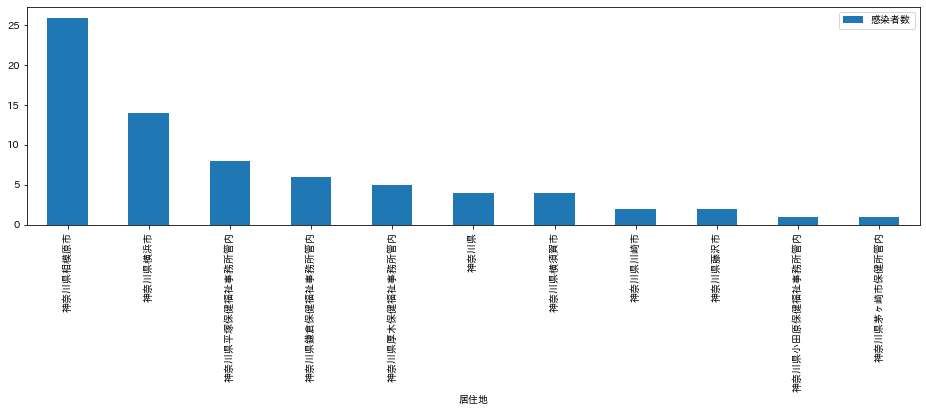

In [13]:
area_df.plot(kind='bar',figsize=(16, 4))

### 年代別

In [14]:
age_df = patients
age_df = age_df.groupby("年代").count()["id"].to_frame()
age_df.rename(columns={"id": "感染者数"}, inplace=True)

In [15]:
age_df

,感染者数
年代,
20代,14
30代,6
40代,7
50代,11
60代,9
70代,13
80代,7
90代,2


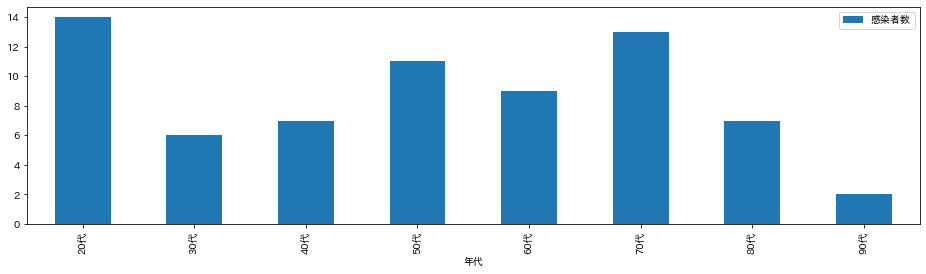

In [16]:
age_df.plot(kind='bar',figsize=(16, 4))

### 男女別

In [17]:
sex_df = patients
sex_df = sex_df.groupby("性別").count()["id"].to_frame()
sex_df.rename(columns={"id": "感染者数"}, inplace=True)

In [18]:
sex_df

,感染者数
性別,
女性,26
男性,43
